In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [189]:
data = pd.read_csv("Creditcard_data.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


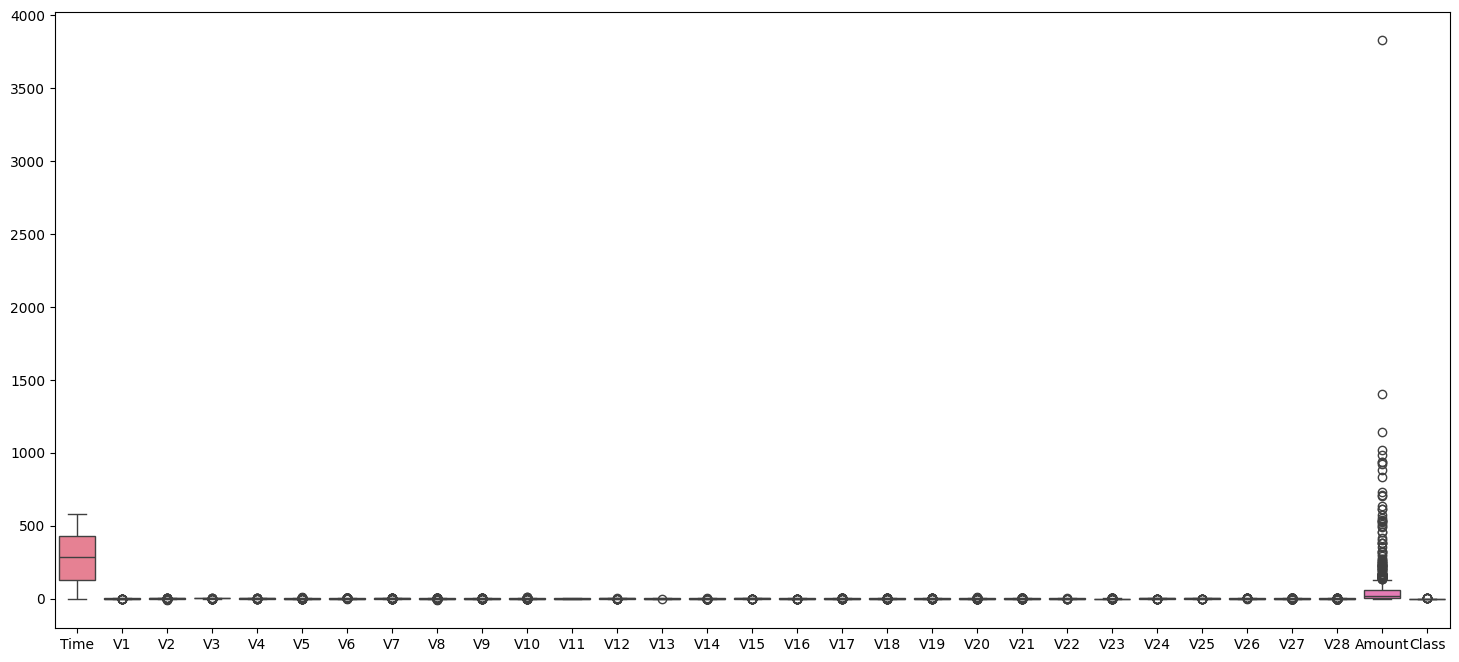

In [190]:
plt.figure(figsize=(18, 8))  # Adjust width and height as needed 
sns.boxplot(data)
# Show the plot
plt.show()

In [191]:
q1=data.Amount.quantile(0.25)
q3=data.Amount.quantile(0.75)
iqr=q3-q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

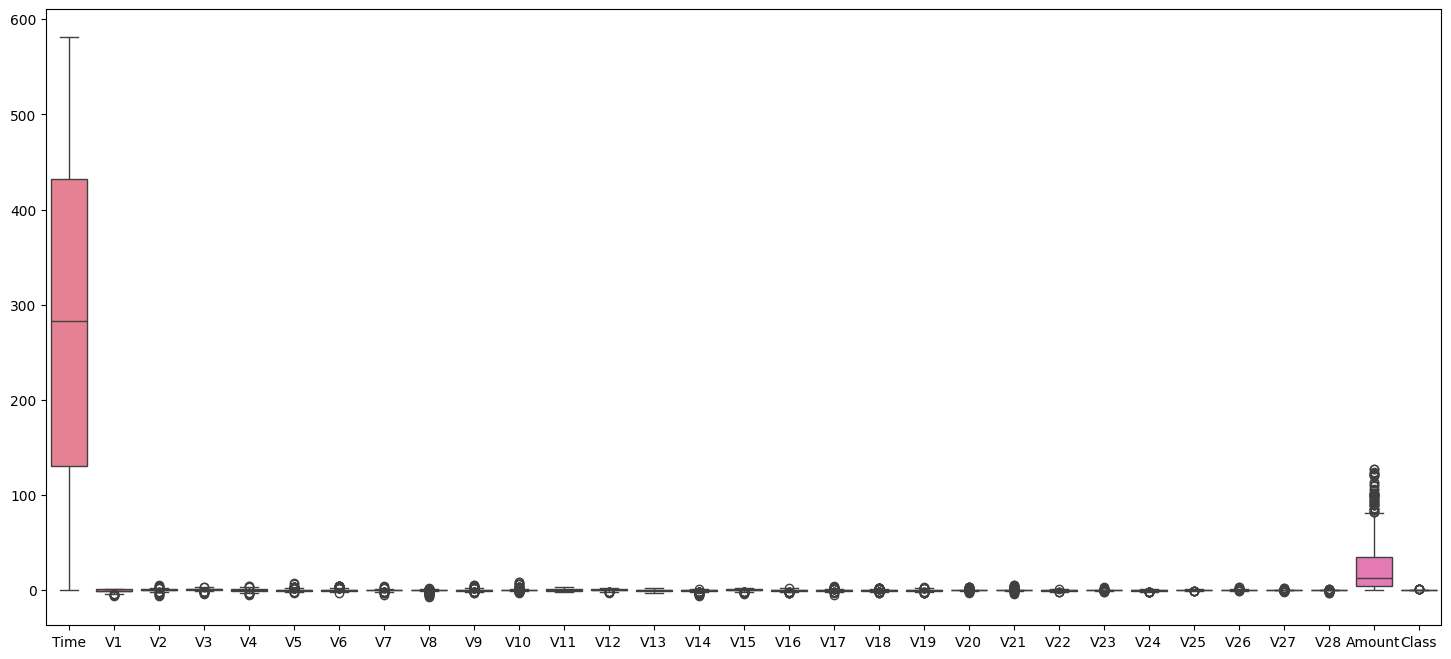

In [192]:

df=data[(data['Amount']>=lower_bound) & (data['Amount']<=upper_bound)]
# Create the boxplot with adjusted figure size
plt.figure(figsize=(18, 8))  # Adjust width and height as needed
 
sns.boxplot(df)
# Show the plot
plt.show()


In [193]:
df.shape

(684, 31)

(array([763.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

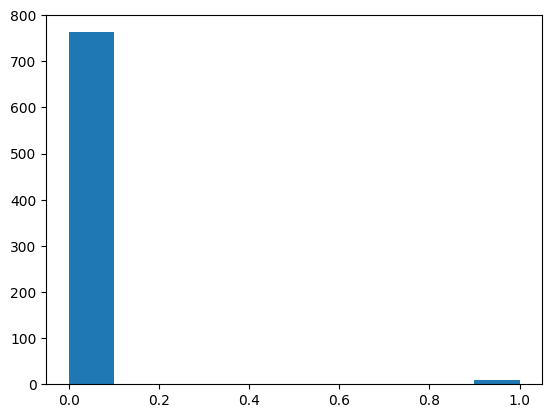

In [194]:
y = data['Class']
plt.hist(y)

In [195]:
from imblearn.over_sampling import SMOTE

def apply_smote_to_dataframe(df, target_column):

  X = df.drop(target_column, axis=1)
  y = df[target_column]

  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X, y)

  df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
  df_resampled.columns = df.columns

  return df_resampled

# Example Usage:

# Assuming 'df' is your original DataFrame
df_resampled = apply_smote_to_dataframe(df, 'Class')

In [196]:
df_resampled['Class'].value_counts()

Class
1    676
0    676
Name: count, dtype: int64

(array([676.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

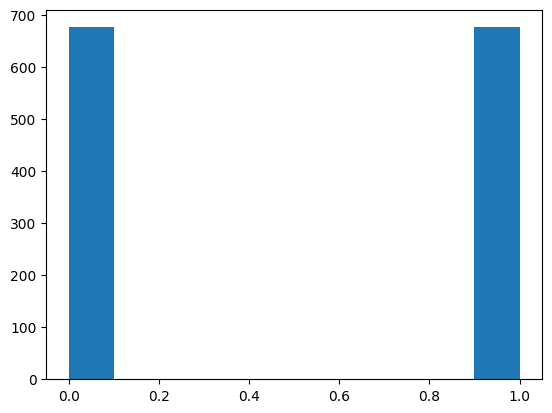

In [197]:
balance = df_resampled['Class']
plt.hist(balance)

In [198]:
# Define parameters for sample size calculation
Z = 1.96  # Z-value for 95% confidence
p = 0.5   # Estimated proportion (maximum variability)
E = 0.05  # Margin of error
N = len(df_resampled)  # Total number of samples in the resampled data

# Calculate the sample size using the formula
sample_size_for_acc = int((Z**2 * p * (1 - p) * N) / (E**2 * (N - 1) + Z**2 * p * (1 - p)))

# Print the calculated sample size
print(f"Calculated Sample Size: {sample_size_for_acc}")

Calculated Sample Size: 299


In [199]:
# systematic sampling 

def create_systematic_samples(df, sample_size, num_samples=5):


  samples = []
  for _ in range(num_samples):
    # Calculate the sampling interval (adjust for potential rounding errors)
    interval = max(1, int(len(df) / sample_size)) 
    # Randomly select a starting point within the interval
    start = np.random.randint(0, interval)
    # Create a list of indices for the sample
    indices = list(range(start, len(df), interval))
    # Adjust the number of indices to match the desired sample size
    indices = indices[:sample_size] 
    # Select rows based on the indices
    sample_df = df.iloc[indices]
    samples.append(sample_df)

  return samples

sample_size = 299  # Example sample size

# Create 5 systematic samples
systematic_samples = create_systematic_samples(df_resampled, sample_size, num_samples=5)

# Access individual samples
for i, sample in enumerate(systematic_samples):
  print(f"Sample {i+1}:")
  print(sample)

Sample 1:
      Time        V1        V2        V3        V4        V5        V6  \
3        2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
7        9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
11      11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
15      13 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
19      18  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
...    ...       ...       ...       ...       ...       ...       ...   
1179    55  0.813466  0.362539  0.263047  0.335421  0.318151  0.030593   
1183   444 -0.804558  0.417044  1.582123  0.174322  0.948696 -0.758863   
1187     0  1.191099  0.265495  0.167027  0.448318  0.060588 -0.082200   
1191   487 -1.003193  0.195551  1.791974  0.249718  1.071125 -0.796291   
1195   567  1.123501  0.424415  0.234858  0.814981 -0.363973 -1.080981   

            V7        V8        V9  ...       V21       V22       V23  \
3     0.476201  0.260314 -0.

In [200]:
# clustring sampling 

def create_cluster_samples(df, cluster_col, sample_size, num_samples=5):

  samples = []
  for _ in range(num_samples):
    # Determine the number of clusters needed to achieve the desired sample size (approximately)
    # Calculate average cluster size
    avg_cluster_size = len(df) / len(df[cluster_col].unique()) 
    # Estimate number of clusters needed
    num_clusters = int(np.ceil(sample_size / avg_cluster_size)) 

    # Randomly select 'num_clusters' from the unique clusters
    selected_clusters = np.random.choice(df[cluster_col].unique(), size=num_clusters, replace=False) 

    # Filter the DataFrame to include only the selected clusters
    sample_df = df[df[cluster_col].isin(selected_clusters)]

    # Adjust the sample_df to have the desired sample size (if necessary)
    if len(sample_df) > sample_size:
      sample_df = sample_df.sample(n=sample_size, random_state=_) 
    elif len(sample_df) < sample_size: 
      # If the selected clusters don't reach the desired size, add more clusters
      while len(sample_df) < sample_size:
        new_cluster = np.random.choice(df[cluster_col].unique(), size=1, replace=False)
        if new_cluster not in selected_clusters: 
          selected_clusters = np.append(selected_clusters, new_cluster)
          sample_df = df[df[cluster_col].isin(selected_clusters)]

    samples.append(sample_df)
  return samples

# Desired sample size
sample_size = sample_size_for_acc

# Create 5 cluster samples
cluster_samples = create_cluster_samples(df_resampled, 'Class', sample_size, num_samples=5)

# Access individual samples
for i, sample in enumerate(cluster_samples):
  print(f"Sample {i+1}:")
  print(sample)

Sample 1:
     Time        V1        V2        V3        V4        V5        V6  \
569   487 -0.517981  0.723072  1.401196  0.772313  0.671651  0.847780   
32     26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
355   292  1.252189 -0.126779  0.280285  0.579416 -0.374125 -0.215217   
190   145 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
407   340  1.270136 -0.608139  0.373101  0.233752 -0.721247  0.396265   
..    ...       ...       ...       ...       ...       ...       ...   
342   283 -0.529996  0.766554  1.759393 -1.160074 -0.501040 -1.404513   
512   432 -0.751710  1.198410  1.287421 -0.384763  0.090426 -0.406865   
138    97  1.273818  0.058009 -1.312428 -0.048969  2.244373  3.296211   
624   530  1.217261 -0.080646 -0.059293 -0.868862 -0.236628 -0.700159   
8      10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   

           V7        V8        V9  ...       V21       V22       V23  \
569  0.352294  0.224071 -2.314242  ... -0

In [201]:
#bootsrap sampling

def create_bootstrap_samples(df, sample_size, num_samples=5):

  samples = []
  for _ in range(num_samples):
    # Sample with replacement from the DataFrame
    sample_df = df.sample(n=sample_size, replace=True) 
    samples.append(sample_df)

  return samples

# Example Usage:
sample_size = sample_size_for_acc
# Assuming you have a DataFrame named 'df' (or 'df_resampled')
# Create 5 bootstrap samples with a sample size of 299
bootstrap_samples = create_bootstrap_samples(df_resampled, sample_size, num_samples=5) 

# Access individual samples
for i, sample in enumerate(bootstrap_samples):
  print(f"Sample {i+1}:")
  print(sample)

Sample 1:
      Time        V1        V2        V3        V4        V5        V6  \
612    522 -0.608941  0.961271  0.978330 -0.375420  0.955270 -0.111386   
448    375 -0.837689  0.777698  1.841252  3.056892  0.303627  0.615335   
708    508 -1.293548  0.242425  1.491293 -0.195788  0.945752 -0.626302   
980    173  0.029176  0.538845  0.469872  0.096091  0.825336  0.238193   
1171   289 -1.164546  1.278044 -0.618026  2.129970  0.124905 -0.619311   
...    ...       ...       ...       ...       ...       ...       ...   
232    192 -0.351287  1.183754  0.530794  0.543891  0.798441 -0.804472   
658    557  1.135721  0.185328  0.532581  1.474706 -0.335261 -0.372402   
383    315 -0.404142  0.502744  1.057148  0.741630  0.537624 -0.003377   
25      23 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
1107   436 -1.763209  1.335679 -0.280686  2.484596  0.068254 -1.218090   

            V7        V8        V9  ...       V21       V22       V23  \
612   1.145462 -0.070023 -0.

In [202]:
# simple random sampling
def create_simple_random_samples(df, sample_size, num_samples=5):
 
  samples = []
  for _ in range(num_samples):
    # Sample with replacement from the DataFrame
    sample_df = df.sample(n=sample_size, replace=False) 
    samples.append(sample_df)

  return samples

# Calculate sample size (adjust as needed)
sample_size = sample_size_for_acc  # Example sample size

# Create 5 simple random samples
simple_random_samples = create_simple_random_samples(df_resampled, sample_size, num_samples=5)

# Access individual samples
for i, sample in enumerate(simple_random_samples):
  print(f"Sample {i+1}:")
  print(sample)

Sample 1:
      Time        V1        V2        V3        V4        V5        V6  \
153    113  1.147554  0.543491  0.504579  2.517930 -0.123555 -0.611120   
878    146  0.517589  0.475573  0.395730  0.332290  0.373967 -0.245358   
366    302  1.073785 -0.170037  0.790656  1.128605 -0.585960  0.070807   
87      67 -0.653445  0.160225  1.592256  1.296832  0.997175 -0.343000   
1149   572  1.103123  0.348641  0.352334  0.621124 -0.291831 -1.027459   
...    ...       ...       ...       ...       ...       ...       ...   
381    313 -0.907420  1.103912  1.288489  1.243612 -0.068032  0.214040   
1232   566  1.090127  0.439253  0.216939  0.845899 -0.365509 -1.084338   
523    442 -0.627617  0.841974  0.840728 -1.351059  0.182650 -0.484541   
843    191  0.814536  0.359952  0.592706  0.590143 -0.101583 -1.036113   
651    551 -0.474661  0.316097  2.446240  0.961007  0.311652  1.857654   

            V7        V8        V9  ...       V21       V22       V23  \
153   0.273076 -0.173271 -0.

In [203]:
import pandas as pd
import numpy as np

def create_stratified_samples(df, strata_col, sample_size, num_samples=5):
  """
  Creates multiple stratified samples from a DataFrame with a target sample size.

  Args:
    df: The pandas DataFrame containing the data.
    strata_col: The name of the column to stratify by.
    sample_size: The desired size of each sample.
    num_samples: The number of samples to create.

  Returns:
    A list of DataFrames, each containing one stratified sample.
  """

  samples = []
  for _ in range(num_samples):
    # Calculate the proportion of each stratum in the DataFrame
    strata_proportions = df[strata_col].value_counts(normalize=True) 

    # Calculate the desired sample size for each stratum
    stratum_sample_sizes = (strata_proportions * sample_size).astype(int) 

    # Adjust sample sizes if necessary to ensure the total sample size is met
    total_samples = stratum_sample_sizes.sum()
    while total_samples < sample_size:
      # Find the stratum with the largest current sample size
      max_stratum = stratum_sample_sizes.idxmax()
      stratum_sample_sizes[max_stratum] += 1
      total_samples += 1

    # Sample from each stratum
    sample_df = pd.concat([
        df.loc[group].sample(n=size, random_state=_) 
        for group, size in df.groupby(strata_col).groups.items() 
    ])

    samples.append(sample_df)

  return samples

# Example Usage:


# Calculate sample size (adjust as needed)
sample_size = 299  # Desired sample size

# Create 5 stratified samples
stratified_samples = create_stratified_samples(df_resampled, 'Class', sample_size, num_samples=5)

# Access individual samples
for i, sample in enumerate(stratified_samples):
  print(f"Sample {i+1}:")
  print(sample)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [174]:
from sklearn.utils import resample
def stratified_sampling(X_resampled, y_resampled, size):
    data = pd.concat([X_resampled, y_resampled], axis=1)
    return resample(data, n_samples=size, stratify=y, random_state=42)
size = 299
t = stratified_sampling(X_resampled,y_resampled,size)
print(t)

      Time        V1        V2        V3        V4        V5        V6  \
979    141  0.646279  0.453706  0.379456  0.395266  0.243862 -0.389332   
1060    86  0.600318  0.416835  0.317443  0.271918  0.463557  0.094219   
254    211 -0.247827 -0.282682  1.653354 -1.014865 -0.680433  0.886364   
859    546 -0.764932 -1.410806  1.647929  0.969622  1.392661 -0.035919   
233    193 -0.922515  0.841577  2.078000  1.373071  0.666526  0.779012   
...    ...       ...       ...       ...       ...       ...       ...   
28      25  1.114009  0.085546  0.493702  1.335760 -0.300189 -0.010754   
1076   469 -1.184078  0.685562  1.121382  0.888283  0.691082 -0.998200   
597    511 -0.259961  0.998646  1.437975  0.038031  0.125405 -0.957775   
708    508 -1.293548  0.242425  1.491293 -0.195788  0.945752 -0.626302   
1255   436 -1.770793  1.344193 -0.299048  2.505502  0.060098 -1.220969   

            V7        V8        V9  ...       V21       V22       V23  \
979   0.194729 -0.026475 -0.046349  ..

In [159]:
bootstrap_samples[2].shape

(299, 31)

In [160]:
#importing models 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score

In [175]:
q=[simple_random_samples[0],bootstrap_samples[0],cluster_samples[0],systematic_samples[0],t]


In [ ]:
count = 0
ans={}
for i in q:
    ans[f"sample_{count+1}"] = {}
    x = df_resampled.drop('Class', axis=1)
    y = df_resampled['Class']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Define a list of models
    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Support Vector Machine', SVC(random_state=42)),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42))
        # ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
    ]
    
    print("\n")
    print("sample no:",count+1)
   
    
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.2f}")
        ans[f"sample_{count+1}"][name] = accuracy
    count = 1+count

accuracy_df = pd.DataFrame(ans)
print(accuracy_df) 




sample no: 1
Logistic Regression Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.84
Support Vector Machine Accuracy: 0.71
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99


sample no: 2
Logistic Regression Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.84
Support Vector Machine Accuracy: 0.71
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99


sample no: 3
Logistic Regression Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.84
Support Vector Machine Accuracy: 0.71
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99


sample no: 4
Logistic Regression Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.84
Support Vector Machine Accuracy: 0.71
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99


sample no: 5
Logistic Regression Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.84
Support Vector Machine Accuracy: 0.71
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99
                        sample_1  sample_2  sample_3  sample_4  sample_5
Logistic Regression   

In [179]:
best = accuracy_df.idxmax()
print(best)

sample_1    Random Forest
sample_2    Random Forest
sample_3    Random Forest
sample_4    Random Forest
sample_5    Random Forest
dtype: object


In [212]:
accuracy_df

,sample_1,sample_2,sample_3,sample_4,sample_5
Logistic Regression,0.953202,0.953202,0.953202,0.953202,0.953202
K-Nearest Neighbors,0.839901,0.839901,0.839901,0.839901,0.839901
Support Vector Machine,0.714286,0.714286,0.714286,0.714286,0.714286
Decision Tree,0.985222,0.985222,0.985222,0.985222,0.985222
Random Forest,0.990148,0.990148,0.990148,0.990148,0.990148
